# Iteration 4_INFOSYS 722  
yzhb363 Emma

- This part starts from Data Preparation of Iteration 4
- I will number each relevant cell as answers
- please run **all cells** at the same time, since all packages are imported at the begining

In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import format_number, col

spark = SparkSession.builder.appName('iteration4').getOrCreate()

In [4]:
# Import pandas.
import pandas as pd

In [5]:
# Import dataset 
dataFrame = spark.read.csv('Dataset/data.csv',header=True,inferSchema=True)

In [6]:
# Show the dataset
pd.DataFrame(dataFrame.take(20), columns=dataFrame.columns)

,ANZSOCGroup,MapDetailName,Region,NumberofVictimisations,NumberofRecords,OccurrenceDayOfWeek,Weapon,YearMonth
0,AggravatedSexualAssault,HillcrestWest.,WaikatoRegion,1,1,UNKNOWN,NotApplicable,1/07/14
1,Non-AggravatedSexualAssault,TeAwamutuCentral.,WaikatoRegion,1,1,Sun,NotApplicable,1/07/14
2,AggravatedSexualAssault,TotaraHeights.,AucklandRegion,1,1,Tue,NotStated,1/07/14
3,AggravatedSexualAssault,FlaxmereEast.,Hawke'sBayRegion,1,1,Sun,NotStated,1/07/14
4,AggravatedSexualAssault,Wairoa.,Hawke'sBayRegion,1,1,UNKNOWN,NotStated,1/07/14
5,AggravatedSexualAssault,Wairoa.,Hawke'sBayRegion,1,1,UNKNOWN,NotStated,1/07/14
6,AggravatedSexualAssault,Brentwood.,WellingtonRegion,1,1,UNKNOWN,NotStated,1/07/14
7,AggravatedSexualAssault,GlenEdenEast.,AucklandRegion,1,1,Mon,NotStated,1/07/14
8,AggravatedSexualAssault,GraftonEast.,AucklandRegion,1,1,Mon,NotStated,1/07/14
9,AggravatedSexualAssault,PukekoheNorth.,AucklandRegion,1,1,Wed,NotApplicable,1/09/14


## 2.3 Data Exploration

In [7]:
# Computer summary of the data
dataFrame.describe().show()

+-------+--------------------+-------------+---------------+----------------------+---------------+-------------------+-----------+---------+
|summary|         ANZSOCGroup|MapDetailName|         Region|NumberofVictimisations|NumberofRecords|OccurrenceDayOfWeek|     Weapon|YearMonth|
+-------+--------------------+-------------+---------------+----------------------+---------------+-------------------+-----------+---------+
|  count|                8354|         7734|           7734|                  8354|           8354|               8354|       8354|     8354|
|   mean|                null|         null|           null|    0.9547522145080201|            1.0|               null|       null|     null|
| stddev|                null|         null|           null|      0.52938282883613|            0.0|               null|       null|     null|
|    min|AggravatedSexualA...|  AbbeyCaves.| AucklandRegion|                     0|              1|                Fri|   Bludgeon|  1/01/15|
|    m

In [8]:
dataFrame.groupBy('ANZSOCGroup').count().orderBy(col('count').desc()).toPandas()

,ANZSOCGroup,count
0,AggravatedSexualAssault,6199
1,Non-AggravatedSexualAssault,2155


In [9]:
dataFrame.groupBy('Region').count().orderBy(col('count').desc()).toPandas()

,Region,count
0,AucklandRegion,2354
1,CanterburyRegion,1025
2,WellingtonRegion,829
3,WaikatoRegion,751
4,None,620
5,BayofPlentyRegion,491
6,Manawatu-WanganuiRegion,468
7,OtagoRegion,402
8,Hawke'sBayRegion,397
9,NorthlandRegion,290


## 3 Data  Preparation
### 3.2 To clean the data, issues must be made explicit, then explicitly resolved.

In [10]:
# Drop null values with their rows
droppedTable = dataFrame.na.drop()

In [11]:
# Remove the columns that do not need 
dropList = ['NumberofVictimisations','NumberofRecords','Weapon','YearMonth']

newData = droppedTable.select([column for column in droppedTable.columns if column not in dropList])

# Drop rows with UNKOWN occurrenceDayofWeek
newData = newData.filter(~col('OccurrenceDayOfWeek').isin(['UNKNOWN']))

newData.show()

+--------------------+--------------------+----------------+-------------------+
|         ANZSOCGroup|       MapDetailName|          Region|OccurrenceDayOfWeek|
+--------------------+--------------------+----------------+-------------------+
|Non-AggravatedSex...|   TeAwamutuCentral.|   WaikatoRegion|                Sun|
|AggravatedSexualA...|      TotaraHeights.|  AucklandRegion|                Tue|
|AggravatedSexualA...|       FlaxmereEast.|Hawke'sBayRegion|                Sun|
|AggravatedSexualA...|       GlenEdenEast.|  AucklandRegion|                Mon|
|AggravatedSexualA...|        GraftonEast.|  AucklandRegion|                Mon|
|AggravatedSexualA...|      PukekoheNorth.|  AucklandRegion|                Wed|
|AggravatedSexualA...|               Wiri.|  AucklandRegion|                Sat|
|AggravatedSexualA...|       StarlingPark.|  AucklandRegion|                Mon|
|AggravatedSexualA...|AucklandHarbourside.|  AucklandRegion|                Mon|
|AggravatedSexualA...|Auckla

In [12]:
# Change column name
cleanData = newData.selectExpr('ANZSOCGroup as AssaultType', 'Region as Region', 
                               'MapDetailName as District', 'OccurrenceDayOfWeek as DayofWeek')

In [13]:
# Show columns before & after cleaning
# Show orginal columns before cleaning
print("Total data columns before cleaning:", dataFrame.count())
print("Total data columns after cleaning:", cleanData.count())

pd.DataFrame(newData.take(20), columns=cleanData.columns)

Total data columns before cleaning: 8354
Total data columns after cleaning: 6057


,AssaultType,Region,District,DayofWeek
0,Non-AggravatedSexualAssault,TeAwamutuCentral.,WaikatoRegion,Sun
1,AggravatedSexualAssault,TotaraHeights.,AucklandRegion,Tue
2,AggravatedSexualAssault,FlaxmereEast.,Hawke'sBayRegion,Sun
3,AggravatedSexualAssault,GlenEdenEast.,AucklandRegion,Mon
4,AggravatedSexualAssault,GraftonEast.,AucklandRegion,Mon
5,AggravatedSexualAssault,PukekoheNorth.,AucklandRegion,Wed
6,AggravatedSexualAssault,Wiri.,AucklandRegion,Sat
7,AggravatedSexualAssault,StarlingPark.,AucklandRegion,Mon
8,AggravatedSexualAssault,AucklandHarbourside.,AucklandRegion,Mon
9,AggravatedSexualAssault,AucklandCentralWest.,AucklandRegion,Sat


In [14]:
# Group by Assault type 
cleanData.groupBy('AssaultType').count().orderBy(col('count').desc()).toPandas()

,AssaultType,count
0,AggravatedSexualAssault,4229
1,Non-AggravatedSexualAssault,1828


In [15]:
# Group by Region 
cleanData.groupBy('Region').count().orderBy(col('count').desc()).toPandas()

,Region,count
0,AucklandRegion,1944
1,CanterburyRegion,750
2,WellingtonRegion,665
3,WaikatoRegion,571
4,BayofPlentyRegion,391
5,Manawatu-WanganuiRegion,352
6,OtagoRegion,308
7,Hawke'sBayRegion,302
8,NorthlandRegion,234
9,TaranakiRegion,160


In [16]:
# Frequency of assualt happens on each day
cleanData.groupBy('DayofWeek').count().orderBy(col('count').desc()).toPandas()

,DayofWeek,count
0,Sun,948
1,Sat,941
2,Fri,924
3,Thu,843
4,Tue,814
5,Wed,809
6,Mon,778


### Model Pipeline

In [17]:
cleanData.printSchema()

root
 |-- AssaultType: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- District: string (nullable = true)
 |-- DayofWeek: string (nullable = true)



In [18]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

# Label
label_stringIdx = StringIndexer(inputCol = 'AssaultType', outputCol = "label")

# Features
region_indexer = StringIndexer(inputCol='Region',outputCol='regionIndex')
district_indexer = StringIndexer(inputCol='District',outputCol='districtIndex')
date_indexer = StringIndexer(inputCol='DayofWeek',outputCol='dateIndex')

# OnehotEncode features
region_encoder = OneHotEncoder(inputCol='regionIndex',outputCol='regionVec')
district_encoder = OneHotEncoder(inputCol='districtIndex',outputCol='districtVec')
date_encoder = OneHotEncoder(inputCol='dateIndex',outputCol='dateVec')

# Set it as feature column
assembler = VectorAssembler(inputCols=['regionVec','dateVec','districtVec'], outputCol="features")

In [19]:
# Get those into pipeline
pipeline = Pipeline(stages=[label_stringIdx, region_indexer, region_encoder, date_indexer, date_encoder,
                            district_indexer, district_encoder, assembler])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(cleanData)
pipe_df = pipelineFit.transform(cleanData)
pipe_df.show(5)

+--------------------+----------------+-----------------+---------+-----+-----------+--------------+---------+-------------+-------------+------------------+--------------------+
|         AssaultType|          Region|         District|DayofWeek|label|regionIndex|     regionVec|dateIndex|      dateVec|districtIndex|       districtVec|            features|
+--------------------+----------------+-----------------+---------+-----+-----------+--------------+---------+-------------+-------------+------------------+--------------------+
|Non-AggravatedSex...|   WaikatoRegion|TeAwamutuCentral.|      Sun|  1.0|        3.0|(15,[3],[1.0])|      0.0|(6,[0],[1.0])|        550.0|(1300,[550],[1.0])|(1321,[3,15,571],...|
|AggravatedSexualA...|  AucklandRegion|   TotaraHeights.|      Tue|  0.0|        0.0|(15,[0],[1.0])|      4.0|(6,[4],[1.0])|        503.0|(1300,[503],[1.0])|(1321,[0,19,524],...|
|AggravatedSexualA...|Hawke'sBayRegion|    FlaxmereEast.|      Sun|  0.0|        7.0|(15,[7],[1.0])|     

### Partition Training & Test sets

In [20]:
# Split data into train and test. 
trainingData, testData = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 4239
Test Dataset Count: 1818


## 7 Data Mining  
### Model Training and Evaluation  

At this part, I use 4 different algorithms to classify New Zealand sexual assault into two types.   
When a new sexual offence happens with location and day of week details, the algorithm will help  
us to assign it into one category.

### Logistic Regression 

In [21]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(trainingData)

### Model Training

In [22]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lr_model.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

<Figure size 640x480 with 1 Axes>

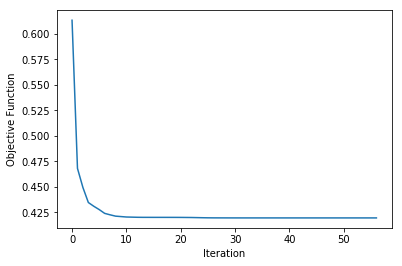

In [23]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = lr_model.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

areaUnderROC: 0.8375780792890238


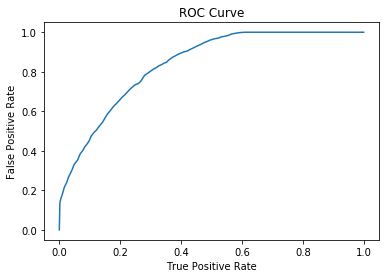

In [24]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

#trainingSummary.roc.show(n=10, truncate=15)
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

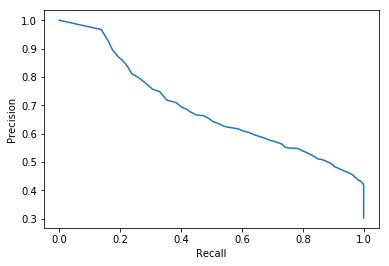

In [25]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

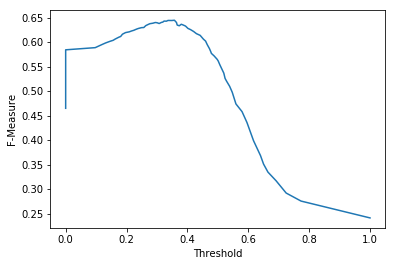

In [26]:
# Set the model threshold to maximize F-Measure
# trainingSummary.fMeasureByThreshold.show(n=10, truncate = 15)
f = trainingSummary.fMeasureByThreshold.toPandas()
plt.plot(f['threshold'],f['F-Measure'])
plt.ylabel('F-Measure')
plt.xlabel('Threshold')
plt.show()

In [27]:
# Make predictions on test data using the transform() method.
predictions = lr_model.transform(testData)

# Look top 20 predictions from the highest probability
predictions.filter(predictions['prediction'] == 0) \
    .select('label','features','rawPrediction','probability','prediction') \
    .orderBy('probability', ascending=False) \
    .show(n = 20, truncate = 30)

+-----+------------------------------+------------------------------+----------------------------+----------+
|label|                      features|                 rawPrediction|                 probability|prediction|
+-----+------------------------------+------------------------------+----------------------------+----------+
|  0.0|(1321,[8,20,668],[1.0,1.0,1...|[54.09359302477963,-54.0935...|[1.0,3.2169998675258012E-24]|       0.0|
|  0.0|(1321,[8,17,476],[1.0,1.0,1...|[54.31425246900899,-54.3142...|[1.0,2.5800009388997846E-24]|       0.0|
|  0.0|(1321,[8,17,668],[1.0,1.0,1...|[54.314527133248646,-54.314...|[1.0,2.5792924022128935E-24]|       0.0|
|  0.0|(1321,[9,16,384],[1.0,1.0,1...|[54.331500948838524,-54.331...|[1.0,2.5358814357526225E-24]|       0.0|
|  0.0|      (1321,[8,476],[1.0,1.0])|[54.362272400943496,-54.362...|[1.0,2.4590370517031415E-24]|       0.0|
|  0.0|(1321,[8,18,652],[1.0,1.0,1...|[54.41120387726462,-54.4112...| [1.0,2.341609128035743E-24]|       0.0|
|  0.0|(13

In [29]:

print("Training: Area Under ROC: " + str(trainingSummary.areaUnderROC))

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Training: Area Under ROC: 0.8375780792890238
Test: Area Under ROC: 0.5976732038969437


### Logistic regression using Cross-Validation  

**This may takes longer time to get result, please wait :)**

In [31]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

lrCrossVa = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             # regularization parameter
             .addGrid(lrCrossVa.regParam, [0.1, 0.3, 0.5]) 
             # Elastic Net Parameter (Ridge = 0)
             .addGrid(lrCrossVa.elasticNetParam, [0.0, 0.1, 0.2]) 
             .build())
             
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lrCrossVa, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)
cvModel = cv.fit(trainingData)

cVpredictions = cvModel.transform(testData)   

In [32]:
cVpredictions.filter(cVpredictions['prediction'] == 0) \
                   .select('label','features','rawPrediction','probability','prediction') \
                   .orderBy('probability', ascending=False) \
                   .show(n = 20, truncate = 30)

+-----+------------------------------+------------------------------+------------------------------+----------+
|label|                      features|                 rawPrediction|                   probability|prediction|
+-----+------------------------------+------------------------------+------------------------------+----------+
|  1.0|(1321,[9,18,553],[1.0,1.0,1...|[1.4466831324170983,-1.4466...|[0.8094874398954598,0.19051...|       0.0|
|  0.0|(1321,[9,19,550],[1.0,1.0,1...|[1.4465489906910607,-1.4465...|[0.8094667520317024,0.19053...|       0.0|
|  0.0|(1321,[9,19,870],[1.0,1.0,1...|[1.4465489906910607,-1.4465...|[0.8094667520317024,0.19053...|       0.0|
|  1.0|(1321,[9,18,223],[1.0,1.0,1...|[1.4416516468520806,-1.4416...|[0.808710288119915,0.191289...|       0.0|
|  0.0|(1321,[9,19,532],[1.0,1.0,1...|[1.4357332022906588,-1.4357...|[0.8077930436257029,0.19220...|       0.0|
|  0.0|(1321,[9,18,344],[1.0,1.0,1...|[1.435451161809383,-1.43545...|[0.8077492492482095,0.19225...|    

In [33]:
# Evaluate prediction
cVevaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
cVevaluator.evaluate(cVpredictions)

print("Test: Area Under ROC: " + str(cVevaluator.evaluate(cVpredictions, {cVevaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.6123624930741516


### Naive Bayes

In [34]:
from pyspark.ml.classification import NaiveBayes

# Build and Train Model
nb = NaiveBayes(smoothing=1)
nBayesModel = nb.fit(trainingData)
nBayespredictions = nBayesModel.transform(testData)

# Look top 20 predictions from the highest probability
nBayespredictions.filter(nBayespredictions['prediction'] == 0) \
                 .select('label','features','rawPrediction','probability','prediction') \
                 .orderBy('probability', ascending=False) \
                 .show(n = 20, truncate = 30)

+-----+------------------------------+------------------------------+------------------------------+----------+
|label|                      features|                 rawPrediction|                   probability|prediction|
+-----+------------------------------+------------------------------+------------------------------+----------+
|  0.0|(1321,[8,18,90],[1.0,1.0,1.0])|[-14.66140314697813,-18.136...|[0.9699675798262068,0.03003...|       0.0|
|  0.0|(1321,[8,18,90],[1.0,1.0,1.0])|[-14.66140314697813,-18.136...|[0.9699675798262068,0.03003...|       0.0|
|  0.0|(1321,[8,20,90],[1.0,1.0,1.0])|[-14.818922723871491,-18.17...|[0.9661884657615842,0.03381...|       0.0|
|  0.0|(1321,[8,16,90],[1.0,1.0,1.0])|[-14.733443578767496,-17.86...|[0.9580442325515252,0.04195...|       0.0|
|  0.0|(1321,[4,17,120],[1.0,1.0,1...|[-14.29843429011785,-17.424...|[0.9579575924766272,0.04204...|       0.0|
|  0.0|(1321,[4,17,120],[1.0,1.0,1...|[-14.29843429011785,-17.424...|[0.9579575924766272,0.04204...|    

In [35]:
# Evaluate prediction
nBayesEvaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
nBayesEvaluator.evaluate(nBayespredictions)

print("Test: Area Under ROC: " + str(nBayesEvaluator.evaluate(nBayespredictions, {nBayesEvaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.6092004109336042


### Random Forest

In [36]:
from pyspark.ml.classification import RandomForestClassifier

randmFor = RandomForestClassifier(labelCol='label', \
                            featuresCol='features', \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)

# Train model with Training Data
rfModel = randmFor.fit(trainingData)

randmForPredictions = rfModel.transform(testData)

# Look top 20 predictions from the highest probability
randmForPredictions.filter(randmForPredictions['prediction'] == 0) \
                   .select('label','features','rawPrediction','probability','prediction') \
                   .orderBy('probability', ascending=False) \
                   .show(n = 20, truncate = 30)

+-----+------------------------------+------------------------------+------------------------------+----------+
|label|                      features|                 rawPrediction|                   probability|prediction|
+-----+------------------------------+------------------------------+------------------------------+----------+
|  0.0|(1321,[1,18,349],[1.0,1.0,1...|[71.8155876923104,28.184412...|[0.7181558769231036,0.28184...|       0.0|
|  0.0|(1321,[1,18,50],[1.0,1.0,1.0])|[71.75759032544498,28.24240...|[0.7175759032544494,0.28242...|       0.0|
|  0.0|(1321,[1,17,50],[1.0,1.0,1.0])|[71.69020488070105,28.30979...|[0.71690204880701,0.2830979...|       0.0|
|  0.0|(1321,[1,17,50],[1.0,1.0,1.0])|[71.69020488070105,28.30979...|[0.71690204880701,0.2830979...|       0.0|
|  1.0|(1321,[1,20,50],[1.0,1.0,1.0])|[71.69020488070105,28.30979...|[0.71690204880701,0.2830979...|       0.0|
|  0.0|(1321,[1,18,145],[1.0,1.0,1...|[71.64840735191444,28.35159...|[0.7164840735191441,0.28351...|    

In [37]:
# Evaluate prediction
randmForEvaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
randmForEvaluator.evaluate(randmForPredictions)

print("Test: Area Under ROC: " + str(randmForEvaluator.evaluate(randmForPredictions, {randmForEvaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.6122593268076465
